![python](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

<font style="color:black;font-size:42px;float:centre;font-family:monospace"><u><b>DATA ANALYSIS PROJECT 1</b></u></font>

# Project:TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> The dataset contains the following features:-
- id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_count - the count of votes recieved.
- release_year = the year the movie was released
- vote_average - average ratings the movie recieved.

### IMPORTING NECESSARY LIBRARIES & DATA

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('tmdb-movies.csv')

### INFORMATION ABOUT OUR DATA

In [48]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### SHAPE OF OUR DATA

In [49]:
data.shape

(10866, 21)

### INFORMATION ABOUT OUR DATA

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### BRIEF DATA DESCRIPTION

In [51]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### NULL DATA(s)

**CHECKING FOR NULL DATAs**

In [52]:
data_null = data.isnull().sum()
data_null

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [53]:
data_null.sum()

13434

### DUPLICATED DATA(s)

**CHECKING FOR DUPLICATES**

In [54]:
data_duplicate = data.duplicated().sum()
data_duplicate

1

In [55]:
data.loc[data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<a id="wrangling"></a>
## Data Wrangling

### DROPPING DUPLICATED DATA(s)

data.drop_duplicates(inplace=True)
data.duplicated().sum()

### DROPPING LESS-USEFUL COLUMNS

In [57]:
less_useful_cols = ['id', 'imdb_id', 'tagline', 'homepage', 'budget_adj', 'revenue_adj']
data.columns
useful_cols = [col for col in data.columns if col not in less_useful_cols]
data = data[useful_cols]
data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### TOTAL NUMBER OF NULL DATA(s) FOR EACH COLUMN

In [58]:
data.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [59]:
data_null = data[data.isnull().any(axis=1)]

original_data_row = data.shape[0]
null_data_row = data_null.shape[0]

print(f'Data rows with missing values = {original_data_row}')
print(f'Original Data rows = {null_data_row}')

non_null_data = original_data_row - null_data_row
print(f'Data without missing values = {non_null_data}')

Data rows with missing values = 10865
Original Data rows = 2199
Data without missing values = 8666


### DROPPING ROW(s) WITH NULL VALUES

In [60]:
data.dropna(inplace=True)
data.shape

(8666, 15)

### CHANGING EACH COLUMN DATATYPE TO THE APPROPRIATE DATATYPE

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8666 non-null   float64
 1   budget                8666 non-null   int64  
 2   revenue               8666 non-null   int64  
 3   original_title        8666 non-null   object 
 4   cast                  8666 non-null   object 
 5   director              8666 non-null   object 
 6   keywords              8666 non-null   object 
 7   overview              8666 non-null   object 
 8   runtime               8666 non-null   int64  
 9   genres                8666 non-null   object 
 10  production_companies  8666 non-null   object 
 11  release_date          8666 non-null   object 
 12  vote_count            8666 non-null   int64  
 13  vote_average          8666 non-null   float64
 14  release_year          8666 non-null   int64  
dtypes: float64(2), int64

In [62]:
data['release_date'] = pd.to_datetime(data['release_date'])

data['release_month'] = data['release_date'].dt.month_name()
data['release_day'] = data['release_date'].dt.day_name()

data.drop(columns = ['release_date'],inplace=True)

data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,release_month,release_day
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,June,Tuesday
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,May,Wednesday
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,March,Wednesday
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,December,Tuesday
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,April,Wednesday


### CREATING A NEW COLUMN NAMED `PROFIT` : REVENUE - BUDGET

In [63]:
data['profit'] = data['revenue'] - data['budget']
data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,release_month,release_day,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,June,Tuesday,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,May,Wednesday,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,March,Wednesday,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,December,Tuesday,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,April,Wednesday,1316249360


### REPLACING THE PIPES IN SOME COLUMN DATAS WITH COMMAs

In [64]:
data['keywords'] = data['keywords'].apply(lambda x : x.replace('|',', '))
data['cast'] = data['cast'].apply(lambda x : x.replace('|',', '))
data['genres'] = data['genres'].apply(lambda x : x.replace('|',', '))
data['production_companies'] = data['production_companies'].apply(lambda x : x.replace('|',', '))

data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,release_month,release_day,profit
0,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...",Twenty-two years after the events of Jurassic ...,124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",5562,6.5,2015,June,Tuesday,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,"future, chase, post-apocalyptic, dystopia, aus...",An apocalyptic story set in the furthest reach...,120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",6185,7.1,2015,May,Wednesday,228436354
2,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...",Beatrice Prior must confront her inner demons ...,119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",2480,6.3,2015,March,Wednesday,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,"android, spaceship, jedi, space opera, 3d",Thirty years after defeating the Galactic Empi...,136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",5292,7.5,2015,December,Tuesday,1868178225
4,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,"car race, speed, revenge, suspense, car",Deckard Shaw seeks revenge against Dominic Tor...,137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",2947,7.3,2015,April,Wednesday,1316249360


### DIVIDING OUR RUNTIME INTO FOUR(4) DIFFERENT CATEGORIES : ` short, moderate, long, very long`  with PANDAS `cut`

In [65]:
data['runtime'].describe()

count    8666.000000
mean      103.815140
std        26.207186
min         0.000000
25%        91.000000
50%       100.000000
75%       113.000000
max       705.000000
Name: runtime, dtype: float64

In [66]:
data['runtime'].nunique()

216

In [93]:
time_list = ['short','moderate','long','very long']
bin_edges = [0,90,100,150,705]
data['movie_length'] = pd.cut(data['runtime'], bin_edges, labels=time_list)
data.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,release_month,release_day,profit,movie_length
0,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...",Twenty-two years after the events of Jurassic ...,124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",5562,6.5,2015,June,Tuesday,1363528810,long
1,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,"future, chase, post-apocalyptic, dystopia, aus...",An apocalyptic story set in the furthest reach...,120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",6185,7.1,2015,May,Wednesday,228436354,long
2,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...",Beatrice Prior must confront her inner demons ...,119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",2480,6.3,2015,March,Wednesday,185238201,long


<a id="eda"></a>
## Exploratory Data Analysis

### CREATING FUNTIONS FOR OUR VISUALS FOR EASY REUSABILITY

In [68]:
def barhplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.show();

def barplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.bar(x, y, align = 'center')
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.show();

def lineplot(value, xlabel, ylabel, title):
    plt.figure(figsize=  (16, 8))
    plt.plot(value)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.show();

def sortby(column):
    data_1 = data.sort_values(by = column, ascending = False)
    return data

### 1. THE FIRST 10 MOST POPULAR MOVIES 

In [94]:
top = data.sort_values(by = 'popularity', ascending = False)
top_10 = top[['original_title', 'popularity','release_year']].head(10)
top_10.drop

<bound method DataFrame.drop of                              original_title  popularity  release_year
0                            Jurassic World   32.985763          2015
1                        Mad Max: Fury Road   28.419936          2015
629                            Interstellar   24.949134          2014
630                 Guardians of the Galaxy   14.311205          2014
2                                 Insurgent   13.112507          2015
631     Captain America: The Winter Soldier   12.971027          2014
1329                              Star Wars   12.037933          1977
632                               John Wick   11.422751          2014
3              Star Wars: The Force Awakens   11.173104          2015
633   The Hunger Games: Mockingjay - Part 1   10.739009          2014>

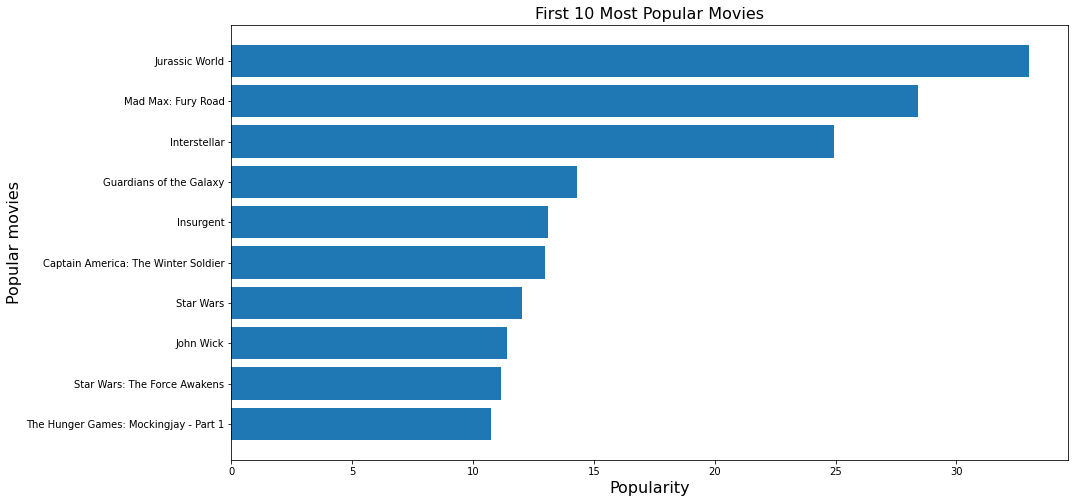

In [70]:
barhplot(top_10['original_title'], top_10.popularity, 'Popularity','Popular movies', 'First 10 Most Popular Movies')

 #### It can be seen that jurassic World `released in 2015` seems to be the most popular movie of all the data

### 2. THE RELATIONSHIP BETWEEN POPULARITY AND THE KEYWORDS ASSOCIATED WITH THE MOVIES

In [71]:
top_key = sortby('popularity')
top_key[['keywords', 'popularity', 'original_title']].head(5)

,keywords,popularity,original_title
0,"monster, dna, tyrannosaurus rex, velociraptor,...",32.985763,Jurassic World
1,"future, chase, post-apocalyptic, dystopia, aus...",28.419936,Mad Max: Fury Road
2,"based on novel, revolution, dystopia, sequel, ...",13.112507,Insurgent
3,"android, spaceship, jedi, space opera, 3d",11.173104,Star Wars: The Force Awakens
4,"car race, speed, revenge, suspense, car",9.335014,Furious 7


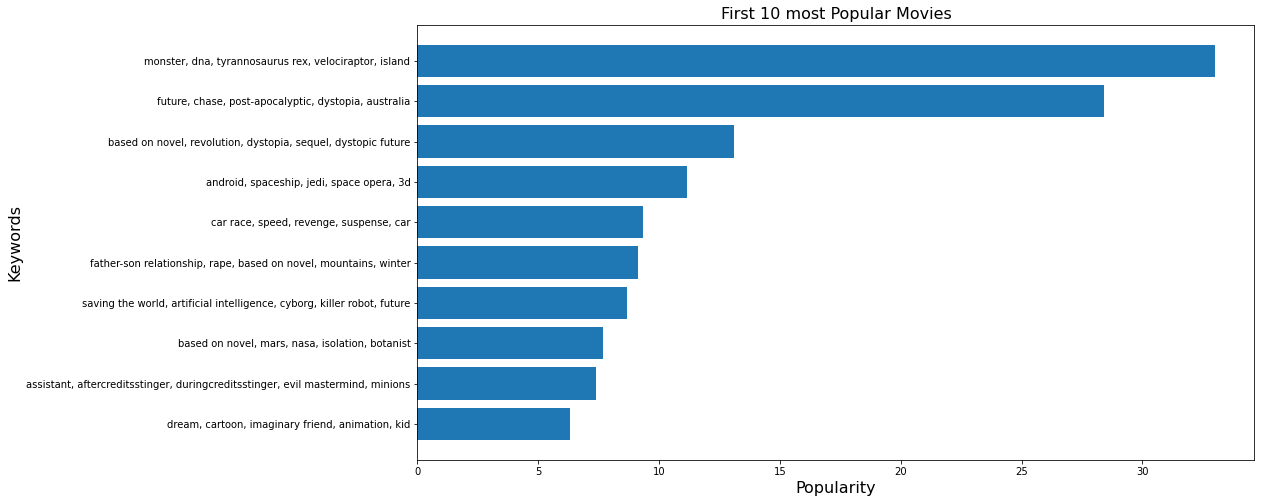

In [72]:
barhplot(top_key.keywords[0:10], top_key.popularity[0:10], "Popularity","Keywords", "First 10 most Popular Movies")

#### It can be seen that most of the most popular movies are mostly science fiction or technology related

### 3. HOW CAST OF A MOVIE AFFECTS THE POPULARITY OF A MOVIE

In [73]:
top_key = sortby('popularity')
top_key[['cast', 'popularity', 'original_title']].head(5)

,cast,popularity,original_title
0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",32.985763,Jurassic World
1,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",28.419936,Mad Max: Fury Road
2,"Shailene Woodley, Theo James, Kate Winslet, An...",13.112507,Insurgent
3,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",11.173104,Star Wars: The Force Awakens
4,"Vin Diesel, Paul Walker, Jason Statham, Michel...",9.335014,Furious 7


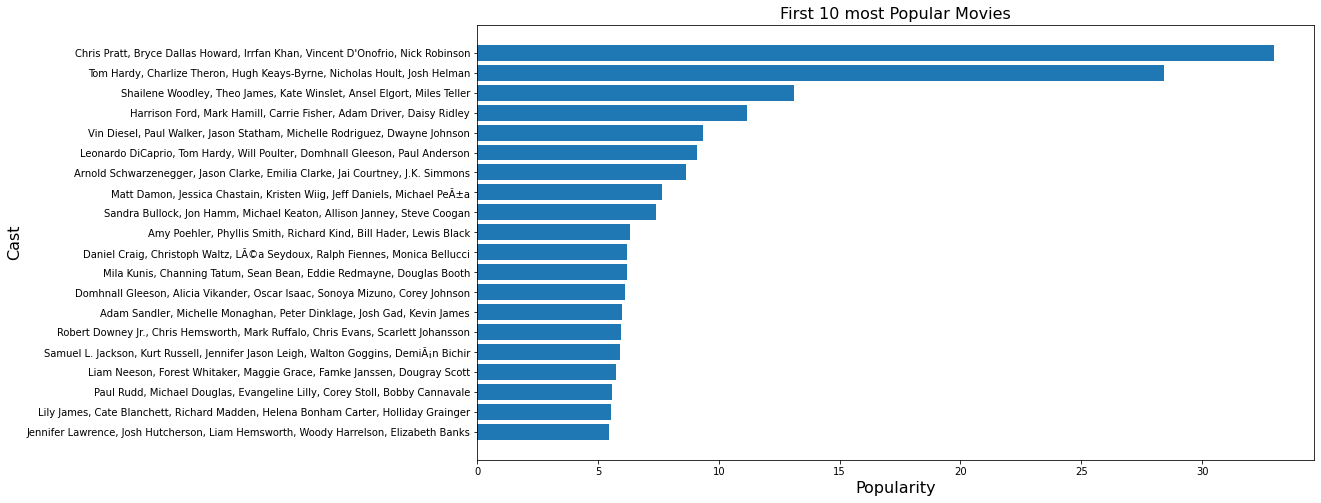

In [74]:
barhplot(top_key.cast[0:20], top_key.popularity[0:20], "Popularity","Cast", "First 10 most Popular Movies")

In [75]:
top.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03
mean,0.741937,1.770937e+07,4.924863e+07,103.815140,264.204823,6.003612,2000.129818,3.153926e+07
std,1.087657,3.357362e+07,1.289529e+08,26.207186,635.195808,0.893539,13.221278,1.069616e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,0.249990,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00
50%,0.449377,1.500000e+06,1.793820e+05,100.000000,54.000000,6.100000,2004.000000,0.000000e+00
75%,0.842984,2.100000e+07,3.890269e+07,113.000000,200.000000,6.600000,2011.000000,1.966175e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,2.544506e+09


### 4. POPULARITY OF A MOVIE BASED ON THE LENGTH OF THE MOVIE

In [76]:
runtime_pop = data.groupby(['movie_length']).mean()['popularity']
runtime_pop.sort_values(ascending= False)

movie_length
very long    1.355874
long         0.905384
moderate     0.619302
short        0.484287
Name: popularity, dtype: float64

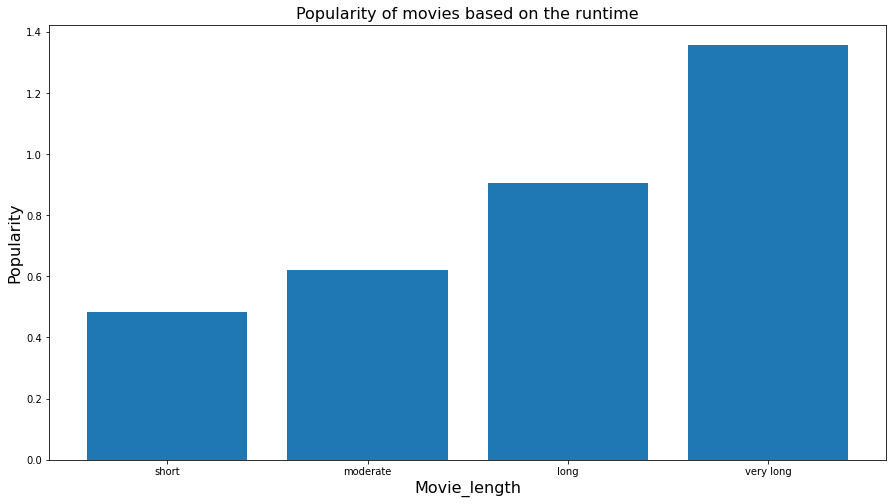

In [77]:
barplot(runtime_pop.index, runtime_pop,"Movie_length", "Popularity", "Popularity of movies based on the runtime")

#### The length of  a movie has effect on the popularity of the movie...
#### As shown by the above barchart, very long movies appears to be the most popular followed by the long movies... etc. 

### 5.  THE EFFECT OF THE MOVIE LENGTH ON THE PROFIT MADE ON THE MOVIES 

In [78]:
runtime_profit = data.groupby(['movie_length']).mean()['profit']
runtime_profit.sort_values(ascending= False)

movie_length
very long    1.006316e+08
long         4.394849e+07
moderate     2.034716e+07
short        1.137088e+07
Name: profit, dtype: float64

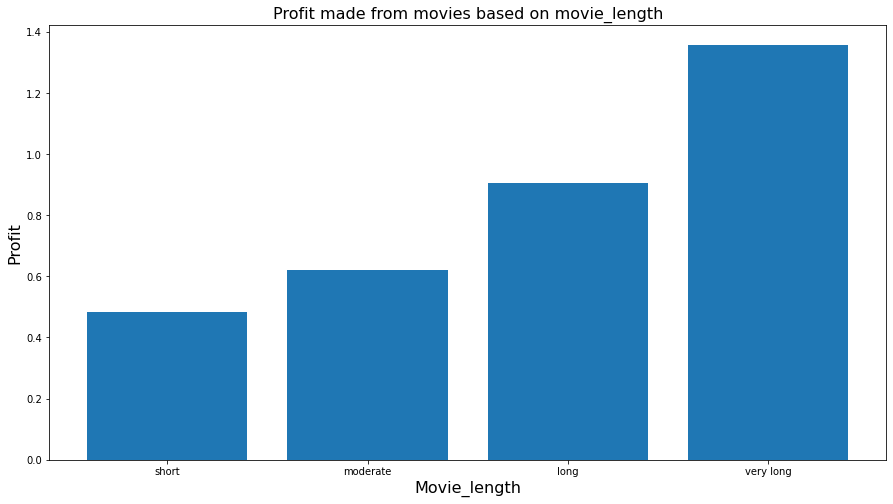

In [79]:
barplot(runtime_pop.index, runtime_pop,"Movie_length", "Profit", "Profit made from movies based on movie_length")

#### The movies with the longest duration seems to make the most profit as seen from the barchart..

### 6. THE EFFECT OF THE RELEASE MONTH ON THE POPULARITY OF THE MOVIE

In [80]:
month_pop = data.groupby(['release_month']).mean()['popularity'].sort_values(ascending= False)
month_pop

release_month
June         0.908816
November     0.866646
July         0.857632
May          0.855181
December     0.854900
March        0.746987
October      0.702567
February     0.668109
August       0.653187
April        0.645327
September    0.630807
January      0.554892
Name: popularity, dtype: float64

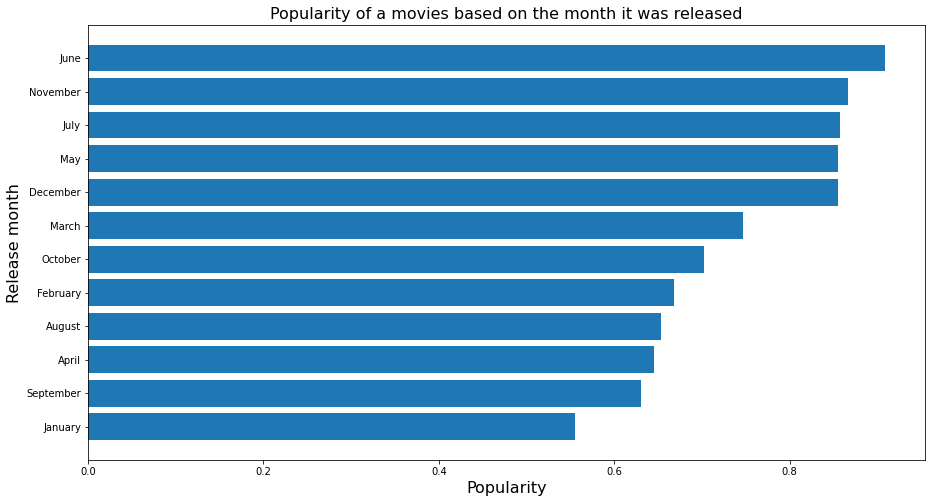

In [81]:
barhplot(month_pop.index, month_pop,"Popularity","Release month", "Popularity of a movies based on the month it was released")

#### The chart above shows that the best months to release a movie are May, June, July, November & December.

### 7. THE EFFECT OF THE RELEASE MONTH OF A MOVIE ON THE PROFIT GENERATED ON THE MOVIE

In [83]:
month_prof = data.groupby(['release_month']).mean()['profit'].sort_values(ascending= False)
month_prof

release_month
June         6.294060e+07
May          5.172680e+07
December     4.734005e+07
November     4.676972e+07
July         4.548263e+07
March        2.943863e+07
April        2.541675e+07
August       1.953273e+07
February     1.918259e+07
October      1.791225e+07
September    1.269144e+07
January      1.046625e+07
Name: profit, dtype: float64

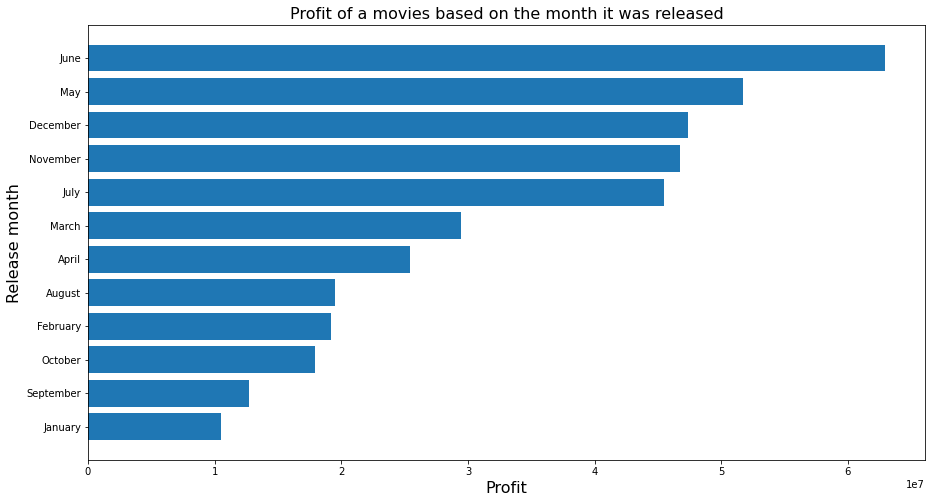

In [84]:
barhplot(month_prof.index, month_prof, "Profit","Release month", "Profit of a movies based on the month it was released")

#### The chart above shows that June makes the highest profit followed by May

### 8. THE INCREASE IN PROFIT ON MOVIES OVER THE YEARS.

In [85]:
top_year = data.groupby('release_year').sum()['profit'].sort_values(ascending= False)
top_year[0:10]

release_year
2015    19188039506
2012    16386295850
2014    16295928255
2013    15319942280
2011    14643137595
2009    13826388461
2010    12660022516
2007    11802908413
2008    11150573332
2004     9698006627
Name: profit, dtype: int64

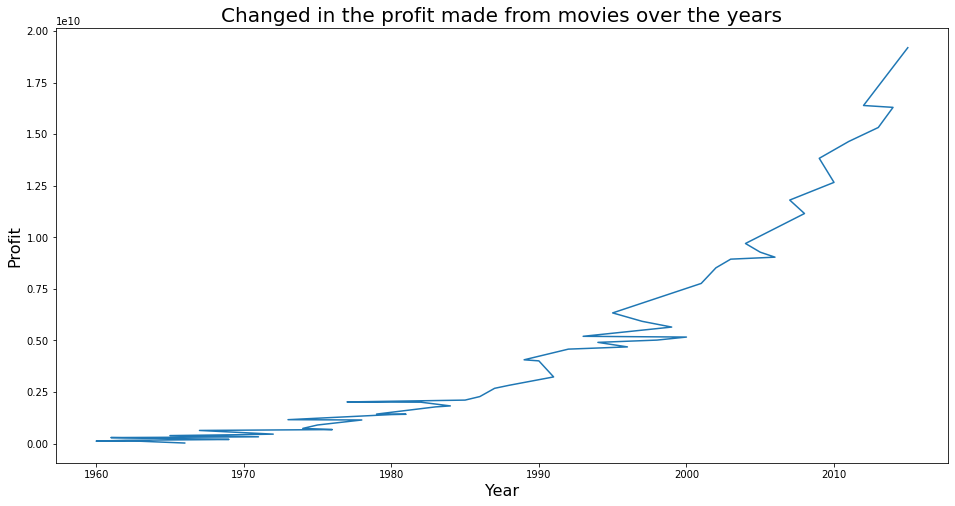

In [86]:
lineplot(top_year, "Year", "Profit", "Changed in the profit made from movies over the years")

#### The lineplot above shows that the profit generated on movies has increased greatly over the years.

<a id = conclusions></a>
## Conclusions

### Deduction: 
> It can be seen that the movie industry has a pretty great future judging from he lat chart showimg the incerease in the profit made over the years.

> The duration of a movie has a really huge effect on the profit and the popularity of the movie as the charts shows pretty good correlation.

> The release month and day also has a significant effect on the popularity and the profit made on the movies.
> - Final conclusions are:
    - The best month of the year to release a movie is June.
    - The best selling movies are the more lengthy movies
    - The most popular movies are the lengthy movies